<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/IMDB_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 0s 0us/step


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


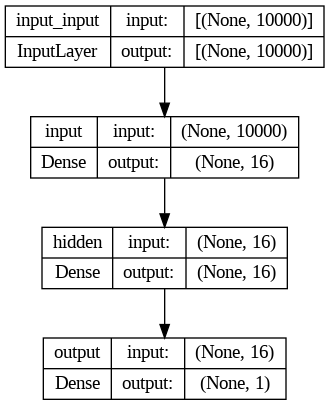

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils, regularizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), kernel_regularizer=regularizers.l2(0.01), name='input'))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

In [21]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 5s 78ms/step - loss: 0.7265 - accuracy: 0.8076 - val_loss: 0.5612 - val_accuracy: 0.8732
Epoch 2/30
49/49 [==============================] - 2s 43ms/step - loss: 0.5145 - accuracy: 0.8826 - val_loss: 0.4986 - val_accuracy: 0.8823
Epoch 3/30
49/49 [==============================] - 3s 65ms/step - loss: 0.4720 - accuracy: 0.8894 - val_loss: 0.5003 - val_accuracy: 0.8653
Epoch 4/30
49/49 [==============================] - 3s 57ms/step - loss: 0.4470 - accuracy: 0.8922 - val_loss: 0.4587 - val_accuracy: 0.8826
Epoch 5/30
49/49 [==============================] - 2s 43ms/step - loss: 0.4352 - accuracy: 0.8941 - val_loss: 0.4954 - val_accuracy: 0.8543
Epoch 6/30
49/49 [==============================] - 2s 42ms/step - loss: 0.4188 - accuracy: 0.8971 - val_loss: 0.4933 - val_accuracy: 0.8504
Epoch 7/30
49/49 [==============================] - 2s 42ms/step - loss: 0.4187 - accuracy: 0.8926 - val_loss: 0.4362 - val_accuracy: 0.8829
Epoch 8/30
49

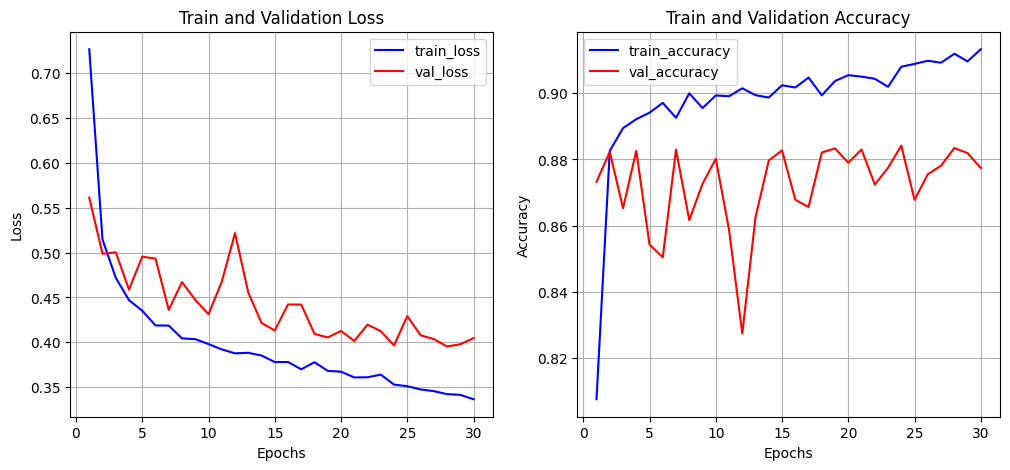

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()